- Adapt the code for pretrained nets to work with Resnet50

# Load libraries

In [42]:
import os
import cv2
from PIL import Image
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
%matplotlib inline

from keras import backend as K

# image processing
from keras.preprocessing import image as image_utils
from keras.preprocessing.image import img_to_array

# pretrained nets
from keras.applications.resnet50 import ResNet50
from keras.applications.resnet50 import preprocess_input, decode_predictions

In [43]:
train_image_files_path = "/keras2production/fruits/Training/"
valid_image_files_path = "/keras2production/fruits/Test/"

In [45]:
model_vgg = ResNet50(weights="imagenet")
model_vgg.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_6 (InputLayer)            (None, 224, 224, 3)  0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_6[0][0]                    
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_conv1 (BatchNormalization)   (None, 112, 112, 64) 256         conv1[0][0]                      
__________________________________________________________________________________________________
activation

In [36]:
train_images = !find $train_image_files_path -type f -name "*.jpg"

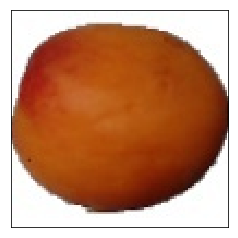

1. maraca: 39.85%
2. spaghetti_squash: 16.40%
3. butternut_squash: 4.02%
4. cello: 3.02%
5. gong: 2.50%
6. croquet_ball: 2.29%
7. banana: 2.13%
8. buckeye: 1.59%
9. punching_bag: 1.44%
10. acorn: 1.42%


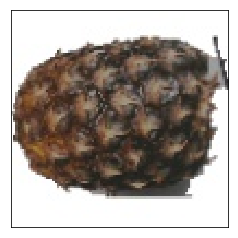

1. hen-of-the-woods: 53.94%
2. honeycomb: 19.31%
3. terrapin: 7.90%
4. custard_apple: 4.78%
5. box_turtle: 3.50%
6. maraca: 1.25%
7. chiton: 0.99%
8. mud_turtle: 0.81%
9. barn_spider: 0.71%
10. electric_ray: 0.67%


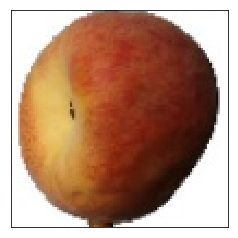

1. pomegranate: 18.16%
2. gong: 12.61%
3. banana: 10.38%
4. strawberry: 5.57%
5. tick: 4.93%
6. maraca: 4.49%
7. buckeye: 4.39%
8. chime: 4.10%
9. orange: 3.98%
10. drum: 3.45%


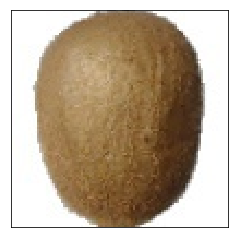

1. maraca: 22.06%
2. knee_pad: 14.64%
3. drum: 6.68%
4. gong: 6.65%
5. tick: 5.77%
6. chime: 5.14%
7. spaghetti_squash: 4.22%
8. microphone: 2.53%
9. shovel: 1.52%
10. wig: 1.48%


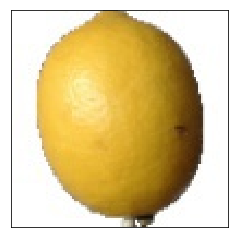

1. lemon: 87.56%
2. maraca: 4.91%
3. croquet_ball: 1.89%
4. orange: 1.62%
5. spaghetti_squash: 1.42%
6. punching_bag: 0.37%
7. spotlight: 0.26%
8. chime: 0.12%
9. jackfruit: 0.12%
10. banana: 0.12%


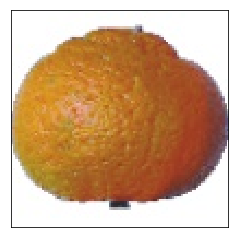

1. orange: 86.94%
2. lemon: 3.38%
3. strawberry: 1.80%
4. jackfruit: 1.06%
5. banana: 0.78%
6. shopping_basket: 0.61%
7. croquet_ball: 0.58%
8. spaghetti_squash: 0.38%
9. nail: 0.24%
10. maraca: 0.21%


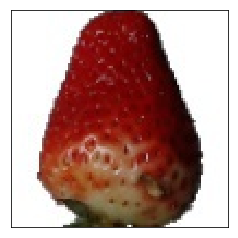

1. strawberry: 99.98%
2. agaric: 0.01%
3. mushroom: 0.00%
4. drum: 0.00%
5. maraca: 0.00%
6. chocolate_sauce: 0.00%
7. candle: 0.00%
8. bearskin: 0.00%
9. trifle: 0.00%
10. strainer: 0.00%


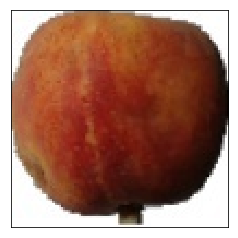

1. strawberry: 17.87%
2. fig: 16.13%
3. buckeye: 14.35%
4. pomegranate: 9.55%
5. plunger: 3.87%
6. hip: 2.95%
7. banana: 2.80%
8. drum: 2.35%
9. hen-of-the-woods: 1.61%
10. custard_apple: 1.61%


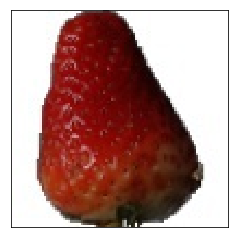

1. strawberry: 99.99%
2. chocolate_sauce: 0.00%
3. bearskin: 0.00%
4. agaric: 0.00%
5. banana: 0.00%
6. candle: 0.00%
7. hip: 0.00%
8. trifle: 0.00%
9. ice_lolly: 0.00%
10. orange: 0.00%


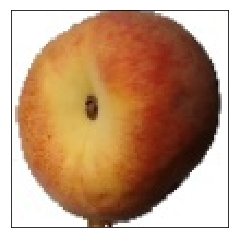

1. bagel: 37.03%
2. strawberry: 12.01%
3. banana: 7.52%
4. gong: 7.48%
5. fig: 5.73%
6. custard_apple: 5.17%
7. Granny_Smith: 2.56%
8. chambered_nautilus: 2.35%
9. chime: 2.35%
10. orange: 1.47%


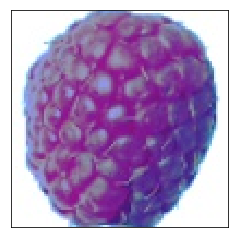

1. strawberry: 58.83%
2. maraca: 14.11%
3. thimble: 2.92%
4. shower_cap: 2.63%
5. golf_ball: 2.39%
6. wool: 1.57%
7. wig: 1.31%
8. vase: 1.14%
9. balloon: 1.06%
10. knee_pad: 0.82%


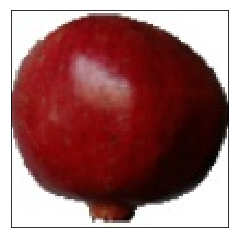

1. punching_bag: 26.44%
2. maraca: 20.11%
3. croquet_ball: 17.81%
4. buckeye: 11.94%
5. pomegranate: 7.01%
6. hip: 2.19%
7. strawberry: 1.84%
8. plunger: 1.23%
9. Granny_Smith: 0.67%
10. nail: 0.60%


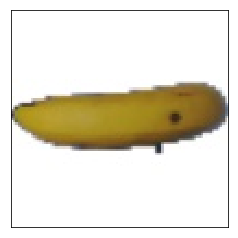

1. banana: 28.35%
2. can_opener: 22.88%
3. corkscrew: 6.33%
4. projectile: 3.71%
5. paddle: 3.55%
6. spaghetti_squash: 3.36%
7. cleaver: 3.24%
8. canoe: 3.17%
9. chain_saw: 2.91%
10. airship: 2.77%


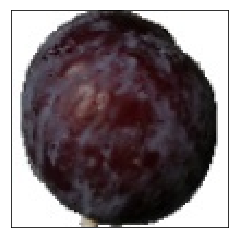

1. fig: 28.79%
2. gong: 13.22%
3. custard_apple: 10.19%
4. chiton: 8.63%
5. strawberry: 6.30%
6. chime: 4.35%
7. bearskin: 2.89%
8. wig: 2.53%
9. electric_ray: 2.26%
10. nail: 1.30%


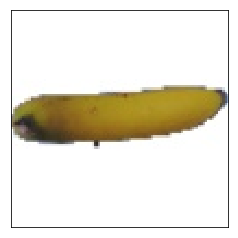

1. banana: 22.54%
2. can_opener: 15.29%
3. corkscrew: 9.14%
4. projectile: 7.04%
5. airship: 5.79%
6. stretcher: 5.43%
7. missile: 3.33%
8. scabbard: 3.21%
9. hook: 2.58%
10. chain_saw: 2.38%


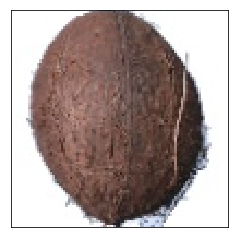

1. gong: 54.64%
2. face_powder: 14.79%
3. chime: 12.03%
4. drum: 9.09%
5. nail: 1.86%
6. toilet_seat: 1.65%
7. chiton: 0.39%
8. wooden_spoon: 0.27%
9. puck: 0.24%
10. shield: 0.24%


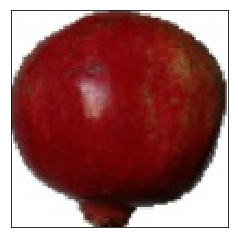

1. pomegranate: 29.96%
2. croquet_ball: 13.07%
3. buckeye: 11.59%
4. maraca: 10.38%
5. strawberry: 5.82%
6. punching_bag: 3.63%
7. hip: 3.42%
8. Granny_Smith: 2.34%
9. bearskin: 1.53%
10. banana: 1.22%


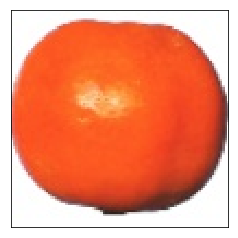

1. punching_bag: 35.50%
2. maraca: 20.80%
3. buckeye: 10.96%
4. croquet_ball: 10.33%
5. orange: 2.77%
6. ping-pong_ball: 2.08%
7. sunscreen: 1.89%
8. plunger: 1.35%
9. nail: 0.83%
10. face_powder: 0.78%


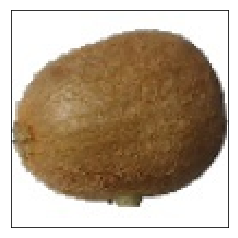

1. electric_ray: 26.99%
2. maraca: 12.11%
3. gong: 7.79%
4. hen-of-the-woods: 6.75%
5. tick: 6.22%
6. face_powder: 5.80%
7. nail: 2.51%
8. chime: 2.29%
9. clog: 2.17%
10. wool: 1.73%


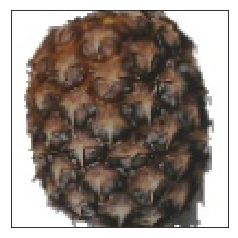

1. hen-of-the-woods: 77.34%
2. honeycomb: 12.15%
3. gyromitra: 4.98%
4. wool: 1.15%
5. wig: 0.39%
6. isopod: 0.35%
7. wall_clock: 0.26%
8. Persian_cat: 0.23%
9. tick: 0.20%
10. nail: 0.19%


In [37]:
num = 20
train_images_r = random.sample(train_images, num)
for i in range(num):
    classify_image(train_images_r[i])

## Pretrained nets

https://keras.io/applications/